In [ ]:
#import the necessary libraries(data manipulation, visualization, financial analysis)
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import talib as ta
import pynance as pn

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)


In [ ]:
# Load AAPL data from the yfinance_data directory
df = pd.read_csv("../yfinance_data/AAPL.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

ticker = 'AAPL'
ticker_row = pd.DataFrame([[ticker]*len(df.columns)], columns=df.columns, index=['Ticker'])

numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_cols:
    df[col] = df[col].astype(float)
    
df = pd.concat([ticker_row, df])
print(df.head())


                        Close      High       Low      Open        Volume
Ticker                   AAPL      AAPL      AAPL      AAPL          AAPL
2009-01-02 00:00:00  2.721686  2.730385  2.554037   2.57563   746015200.0
2009-01-05 00:00:00  2.836553  2.884539  2.780469  2.794266  1181608400.0
2009-01-06 00:00:00  2.789767  2.914229  2.770872  2.877641  1289310400.0
2009-01-07 00:00:00  2.729484   2.77417   2.70699  2.753477   753048800.0


In [ ]:
# Clean column names if they are MultiIndex

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)  
print("Cleaned columns:", df.columns.tolist())
df["Ticker"] = ticker

df_numeric_index = df[df.index != 'Ticker'].copy()
df_numeric_index.index = pd.to_datetime(df_numeric_index.index)
df_numeric_index = df_numeric_index.sort_index()

print(df_numeric_index.head())

Cleaned columns: ['Close', 'High', 'Low', 'Open', 'Volume']
               Close      High       Low      Open      Volume Ticker
2009-01-02  2.721686  2.730385  2.554037   2.57563   746015200   AAPL
2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400   AAPL
2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400   AAPL
2009-01-07  2.729484   2.77417   2.70699  2.753477   753048800   AAPL
2009-01-08  2.780169  2.793666  2.700393   2.71209   673500800   AAPL


In [ ]:
# Basic Exploratory Data Analysis
print(df.info())
print(df.describe())
print(df.isnull().sum())  
df.dropna(inplace=True)  

<class 'pandas.core.frame.DataFrame'>
Index: 3775 entries, Ticker to 2023-12-29 00:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   3775 non-null   object
 1   High    3775 non-null   object
 2   Low     3775 non-null   object
 3   Open    3775 non-null   object
 4   Volume  3775 non-null   object
 5   Ticker  3775 non-null   object
dtypes: object(6)
memory usage: 206.4+ KB
None
              Close  High   Low  Open     Volume Ticker
count   3775.000000  3775  3775  3775       3775   3775
unique  3723.000000  3775  3775  3775       3764      1
top       24.022596  AAPL  AAPL  AAPL  420786800   AAPL
freq       2.000000     1     1     1          2   3775
Close     0
High      0
Low       0
Open      0
Volume    0
Ticker    0
dtype: int64


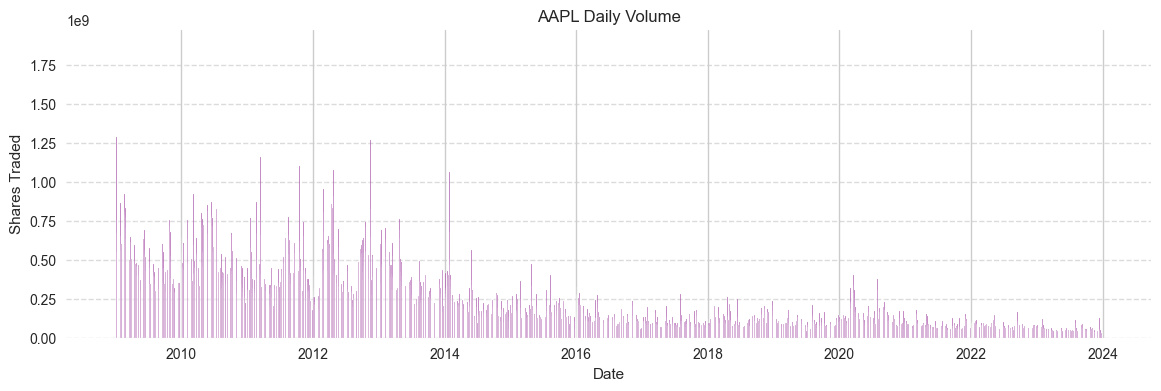

In [82]:
plt.figure(figsize=(14,4))
plt.bar(df.index, df["Volume"], color="purple", alpha=0.6)
plt.title("AAPL Daily Volume")
plt.xlabel("Date")
plt.ylabel("Shares Traded")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


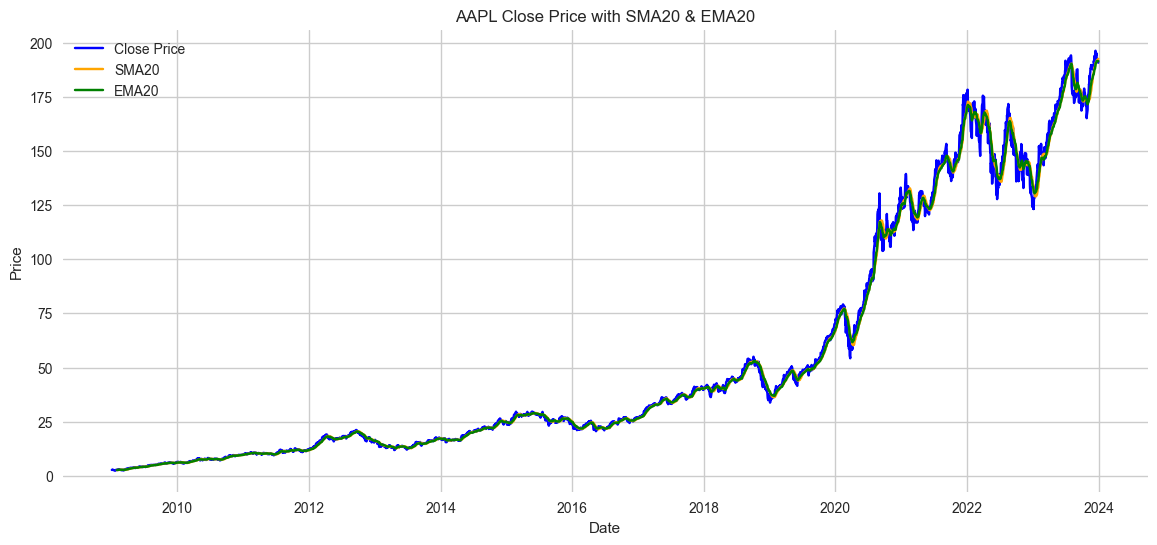

In [ ]:
# SMA and EMA Plot 
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA20'], label='SMA20', color='orange')
plt.plot(df['EMA20'], label='EMA20', color='green')
plt.title('AAPL Close Price with SMA20 & EMA20')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


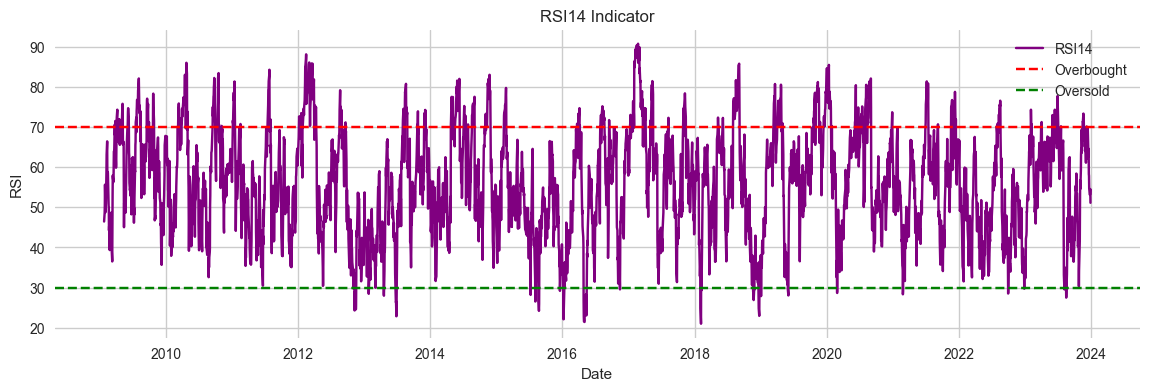

In [ ]:
#RSI Indicator Plot
plt.figure(figsize=(14,4))
plt.plot(df['RSI14'], label='RSI14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('RSI14 Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


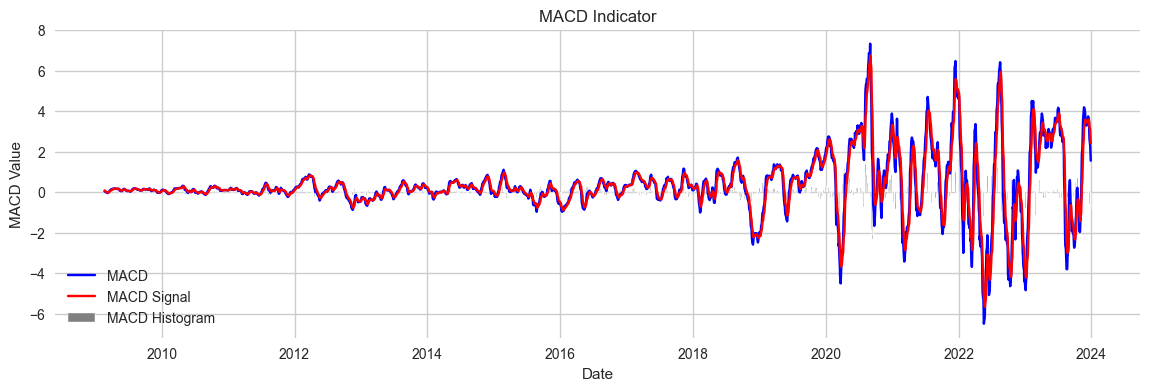

In [ ]:
# MACD indicator plot
plt.figure(figsize=(14,4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_signal'], label='MACD Signal', color='red')
plt.bar(df.index, df['MACD_hist'], label='MACD Histogram', color='gray')
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()


In [ ]:
# Quantitative Analysis - Annualized Return, Volatility, Sharpe Ratio
df['Daily_Return'] = df['Close'].pct_change()
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

annual_vol = df['Daily_Return'].std() * np.sqrt(252)

annual_return = df['Daily_Return'].mean() * 252
sharpe_ratio = annual_return / annual_vol

print(f"Annualized Return: {annual_return:.2%}")
print(f"Annualized Volatility: {annual_vol:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Annualized Return: 32.49%
Annualized Volatility: 28.59%
Sharpe Ratio: 1.14


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_30040\3994525026.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Daily_Return'] = df['Close'].pct_change()


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_30040\4025162129.py:30: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\HP EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


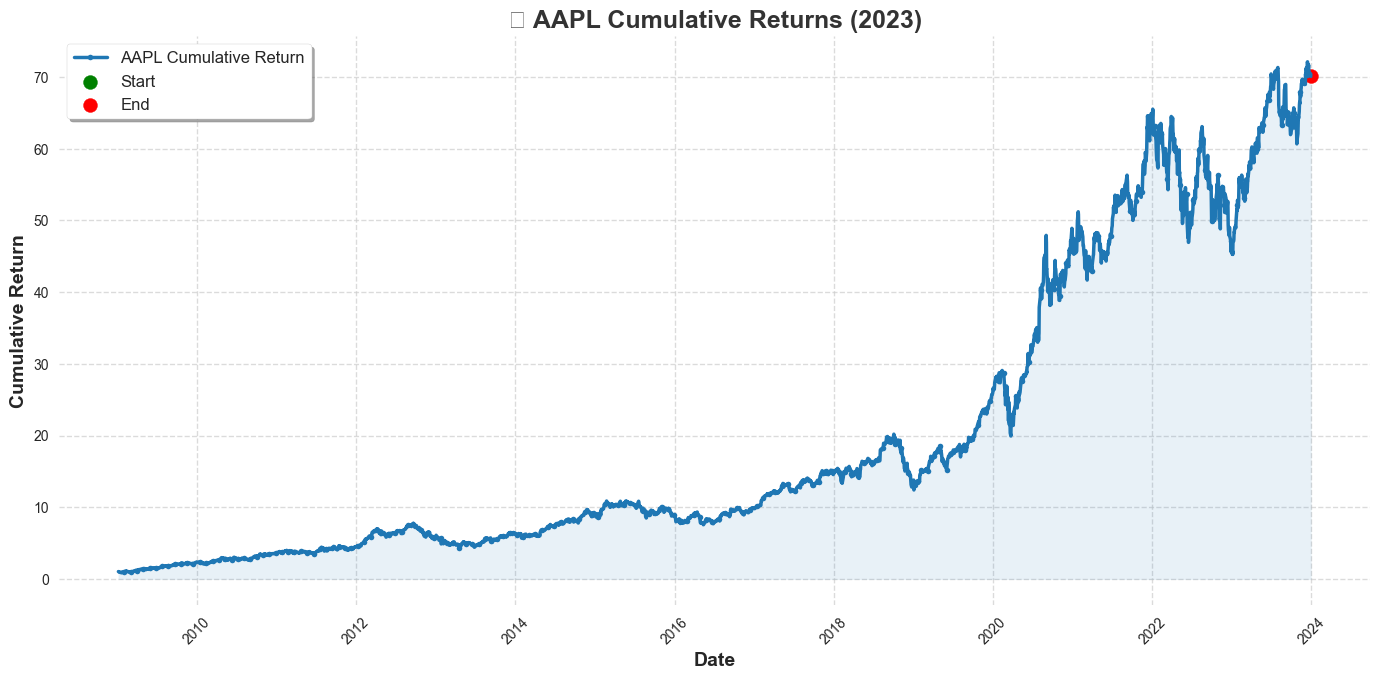

In [ ]:
# Cumulative Return Plot with Enhanced Visualization
plt.figure(figsize=(14,7))
plt.plot(df.index, df['Cumulative_Return'], label="AAPL Cumulative Return", 
         color="#1f77b4", linewidth=2.5, marker='o', markersize=4, markevery=20)

plt.fill_between(df.index, df['Cumulative_Return'], color="#1f77b4", alpha=0.1)
plt.grid(True, linestyle='--', alpha=0.7)

plt.title("📈 AAPL Cumulative Returns (2023)", fontsize=18, fontweight='bold', color="#333333")
plt.xlabel("Date", fontsize=14, fontweight='bold')
plt.ylabel("Cumulative Return", fontsize=14, fontweight='bold')

plt.scatter(df.index[0], df['Cumulative_Return'].iloc[0], color="green", s=100, label="Start")
plt.scatter(df.index[-1], df['Cumulative_Return'].iloc[-1], color="red", s=100, label="End")
plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()